In [1]:
import riskModelBuilder as rmb
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import preprocessing as skpre
from matplotlib import pyplot as plt
import seaborn as sb

/home/louisf/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
min_set = [
    'naccidents',
]

In [ ]:
mb.traindata.shape

In [ ]:
# Gather all data and do some cleaning

mb = rmb.Alldata('roadinventory', 'segments_full')
mb.getData()
mb.cleanData(todrop=min_set)
np.random.seed(seed=127)

shuffleData = np.random.shuffle(mb.traindata)

In [ ]:
fun.acc_risk.plot()

In [ ]:
tested = mb.test[35000:, :]
N = mb.test[35000:,:].shape[0]
N2 = mb.test[35000:,:].shape[1]
b = np.zeros((N, N2 + 2))
b[:,:-2] = mb.test[35000:,:]
b[:,-2] = y_test
b[:,-1] = rf_pred

In [ ]:
np.savetxt('prediction.csv', b, delimiter = ',')

In [ ]:
# Perform a random forest regression 

trainer = rmb.Model()

shuffleData = mb.traindata


y = shuffleData[0:48000,-1]
X = shuffleData[0:48000,:-1]

y_test = shuffleData[48000:,-1]
X_test = shuffleData[48000:,:-1]

n_estimators = 100
val_frac = 0.2
#score, oob_score, rf_pred, x_test, y_test= trainer.rf_regression(X, y, n_estimators, test_frac)

##### HACK
score, oob_score, rf_pred, x_val, y_val, rf= trainer.rf_regression(X, y, n_estimators, val_frac)
pred_max = np.max(rf_pred)

In [ ]:
print('score: {}'.format(score))
print('oob score: {}'.format(oob_score))

In [ ]:
rf.predict(mb.all)

In [ ]:
fig = sb.regplot(y_test, rf_pred, fit_reg=False, scatter_kws={"s":100})
import seaborn as sb
sb.set_context('talk')
fig.set(ylim=[-1, None], xlim=[-1, None])

fig.figure.set_size_inches(12,8)
fig.axes.set_title('Random forest regression', fontsize=34)
fig.set_xlabel("Measured risk",size = 24)
fig.set_ylabel("Predicted risk",size = 24)
fig.tick_params(labelsize=14,labelcolor="black")

fig.text(15, pred_max-1, 'Number of estimators: {0}'.format(n_estimators))
fig.text(15, pred_max-5, 'Test ratio: {0}'.format(test_frac))
fig.text(15, pred_max-9, r'R$^2$: {0}'.format(round(score,2)))
fig.text(15, pred_max-13, 'Out of bag R$^2$: {0}'.format(round(oob_score,2)))

fig.plot(np.linspace(-5,50, 1000), np.linspace(-5, 50, 1000))

"""plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/rf_no_adt_{0}est.png'.format(str(n_estimators)),
            dpi=300,
           bbox_inches="tight")"""

In [ ]:
fig = sb.regplot(y_test, rf_pred, fit_reg=False, scatter_kws={"s":100})
import seaborn as sb
sb.set_context('talk')
fig.set(ylim=[-1, 10], xlim=[-1, 10])

fig.figure.set_size_inches(12,8)
fig.axes.set_title('Random forest regression', fontsize=34)
fig.set_xlabel("Measured risk",size = 24)
fig.set_ylabel("Predicted risk",size = 24)
fig.tick_params(labelsize=14,labelcolor="black")
"""
fig.text(15, pred_max-1, 'Number of estimators: {0}'.format(n_estimators))
fig.text(15, pred_max-5, 'Test ratio: {0}'.format(test_frac))
fig.text(15, pred_max-9, r'R$^2$: {0}'.format(round(score,2)))
fig.text(15, pred_max-13, 'Out of bag R$^2$: {0}'.format(round(oob_score,2)))
"""
fig.plot(np.linspace(-5,50, 1000), np.linspace(-5, 50, 1000))

plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/rf_no_adt_{0}est_zoom.png'.format(str(n_estimators)),
            dpi=300,
           bbox_inches="tight")

In [ ]:
# Perform an univariate analysis to look for linearities

for i in range(0,mb.test.shape[1]-1):
    n = plt.figure(i)
    fig = sb.regplot(X[:,i], y, fit_reg=False, scatter_kws={"s":100})
    fig.axes.set_title('Univariate analysis', fontsize=34)
    fig.set_xlabel("var number {0}".format(str(i)),size = 24)
    fig.set_ylabel("",size = 24)
    plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/uva{0}.png'.format(str(i)), dpi=150)
    plt.close()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)

In [ ]:
inddict = {}
for i in range(0,x_test.shape[1]-1):
    inddict[x_test[i,387]]=y_test[i]

In [ ]:
35000/58300


In [ ]:
import tempfile

x = np.linspace(0, 50)
y = np.linspace(50, 0)
fig = plt.figure(figsize=(10, 10), dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, '-')
ax.set_xlabel('X')
ax.set_ylabel('Y')
f = tempfile.NamedTemporaryFile(
    dir='/home/louisf/Documents/Insight/massdriver/webapp/static/temp',
    suffix='.png', delete=False
)
plt.savefig('/home/louisf/Documents/Insight/massdriver/webapp/static/temp/A.png')
plt.savefig(f, bbox_inches='tight')
f.close()

In [ ]:
ndata = mb.table.drop('acc_risk', axis=1)

In [ ]:
ndata2 = ndata.replace([np.inf, -np.inf], np.nan).dropna(how="all")

In [ ]:
ndata2.select_dtypes(include=['int64', 'float64']).as_matrix().shape

In [ ]:
mb = rmb.Alldata('roadinventory', 'segments_full')
mb.getData()

t = mb.table

In [ ]:
t['acc_risk'] = t['naccidents'] /t['assignedle']

In [ ]:
t.drop('naccidents', axis=1, inplace=True)

In [ ]:
t2 = t.loc[~pd.isnull(t['acc_risk']), 'acc_risk']

In [ ]:
t3 = t2.replace([np.inf, -np.inf], np.nan).dropna(how="all")

In [ ]:
t_nonan = t.iloc[t3.index]

In [ ]:
t_nonan2 = t_nonan.select_dtypes(include=['int64', 'float64']).as_matrix()

In [ ]:
t_nonan2.shape

In [ ]:
un =  [len(np.unique(t_nonan2[:, i])) for i in range(t_nonan2.shape[1])]

In [ ]:
enc = skpre.OneHotEncoder(categorical_features=np.array(un) < 30)
x_nocat = enc.fit_transform(t_nonan2).toarray()

In [ ]:
x_nocat.shape

In [2]:
# Start here!
import sklearn as sk
import numpy as np

mb = rmb.Alldata('roadinventory', 'segments_full')
mb.getData()

t = mb.table
t['acc_risk'] = t['naccidents'] /t['assignedle']
t.drop('naccidents', axis=1, inplace=True)

all3 = t.select_dtypes(include=['int64', 'float64']).as_matrix()


In [3]:
unique_all = [len(np.unique(all3[:, i])) for i in range(all3.shape[1]-1)]
enc2 = skpre.OneHotEncoder(categorical_features=np.array(unique_all) < 30)
np.random.shuffle(all3)
x_all = enc2.fit_transform(all3[:,:-1]).toarray()
x_all_norm = (x_all-np.mean(x_all, axis=0))/np.std(x_all, axis=0)
nancols = sum(np.isnan(x_all_norm))>0
x_all_norm_nonan = x_all_norm[:,~nancols]
del x_all
del x_all_norm

In [24]:
yind = ~np.isnan(all3[:,-1])

y_model = (all3[yind,-1]-np.mean(all3[yind,-1], axis=0))/np.std(all3[yind,-1], axis=0)
X_model = x_all_norm_nonan[yind,:-1]

trainer = rmb.Model()

y_train = y_model[0:48000]
X_train = X_model[0:48000,:]

y_test = y_model[48000:]
X_test = X_model[48000:,:]

n_estimators = 100
val_frac = 0.2
#score, oob_score, rf_pred, x_test, y_test= trainer.rf_regression(X, y, n_estimators, test_frac)

##### HACK
score, oob_score, rf_pred, x_val, y_val, rf= trainer.rf_regression(X_train, y_train, n_estimators, val_frac)
print('score: {0}, oob_score: {1}'.format(score, oob_score))

score: 0.46056161006708307, oob_score: 0.3064395635825796


In [ ]:
rf2 = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, oob_score=True)

sk.cross_validation.cross_val_score(rf2, X_train, y_train, cv=sk.cross_validation.KFold(len(y_train),shuffle=True))

In [25]:
y_pred = rf.predict(X_test)
testscore = rf.score(X_test, y_test)

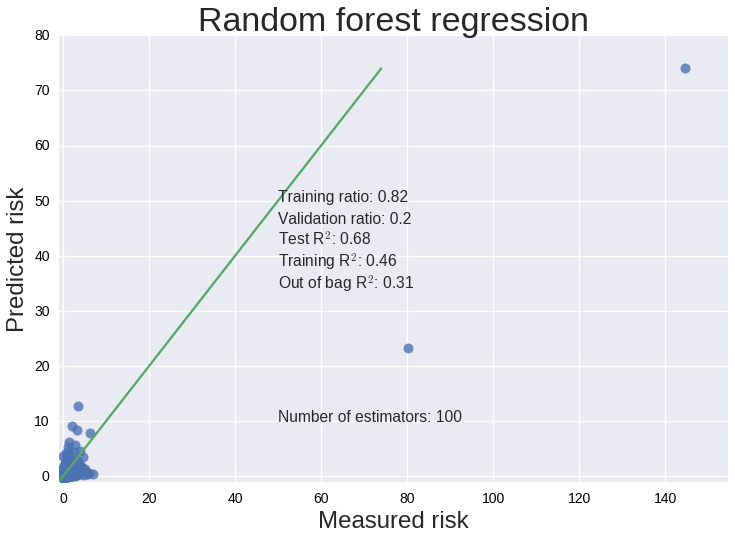

In [27]:
fig = sb.regplot(y_test, y_pred, fit_reg=False, scatter_kws={"s":100})
import seaborn as sb
sb.set_context('talk')
fig.set(ylim=[-1, None], xlim=[-1, max(y_test)+10])


fig.figure.set_size_inches(12,8)
fig.axes.set_title('Random forest regression', fontsize=34)
fig.set_xlabel("Measured risk",size = 24)
fig.set_ylabel("Predicted risk",size = 24)
fig.tick_params(labelsize=14,labelcolor="black")

pred_max = max(y_pred)

fig.text(50, 10, 'Number of estimators: {0}'.format(n_estimators))
fig.text(50, 50, 'Training ratio: {0}'.format(round(48000/len(y_model),2)))
fig.text(50, 46, 'Validation ratio: {0}'.format(val_frac))
fig.text(50, 42, r'Test R$^2$: {0}'.format(round(testscore,2)))
fig.text(50, 38, r'Training R$^2$: {0}'.format(round(score,2)))
fig.text(50, 34, 'Out of bag R$^2$: {0}'.format(round(oob_score,2)))

fig.plot(np.linspace(-5,pred_max, 1000), np.linspace(-5, pred_max, 1000))

plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/rf_20160617{0}est.png'.format(str(n_estimators)),
            dpi=300,
           bbox_inches="tight")

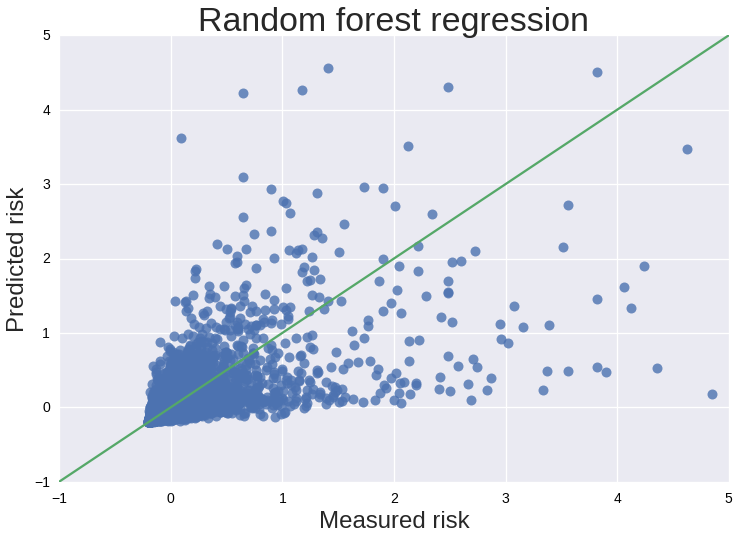

In [28]:
fig = sb.regplot(y_test, y_pred, fit_reg=False, scatter_kws={"s":100})
import seaborn as sb
sb.set_context('talk')
fig.set(ylim=[-1,5], xlim=[-1,5])

fig.figure.set_size_inches(12,8)
fig.axes.set_title('Random forest regression', fontsize=34)
fig.set_xlabel("Measured risk",size = 24)
fig.set_ylabel("Predicted risk",size = 24)
fig.tick_params(labelsize=14,labelcolor="black")
"""
fig.text(15, pred_max-1, 'Number of estimators: {0}'.format(n_estimators))
fig.text(15, pred_max-5, 'Test ratio: {0}'.format(test_frac))
fig.text(15, pred_max-9, r'R$^2$: {0}'.format(round(score,2)))
fig.text(15, pred_max-13, 'Out of bag R$^2$: {0}'.format(round(oob_score,2)))
"""
fig.plot(np.linspace(-5,pred_max, 1000), np.linspace(-5, pred_max, 1000))

plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/rf_20160617_zoom.png'.format(str(n_estimators)),
            dpi=300,
           bbox_inches="tight")

In [ ]:
max(y_test)

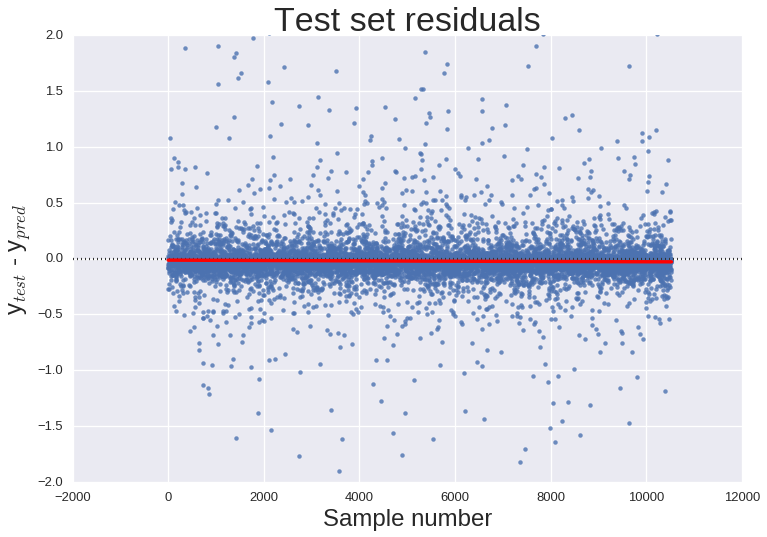

In [29]:
fig = sb.residplot(np.linspace(0,len(y_test), len(y_test)), y_test- y_pred, lowess=True, line_kws={'color':'red'})
sb.set_context('talk')

fig.figure.set_size_inches(12,8)
fig.set(ylim=[-2, 2])
fig.axes.set_title('Test set residuals', fontsize=34)
fig.set_xlabel('Sample number',size = 24)
fig.set_ylabel("y$_{test}$ - y$_{pred}$",size = 24)

plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/rf_residuals_20160617.png'.format(str(n_estimators)),
            dpi=300,
           bbox_inches="tight")

In [32]:
pred_all = rf.predict(x_all_norm_nonan[:,:-1])

In [51]:
new_all = np.concatenate((all3, pred_all))

ValueError: all the input arrays must have same number of dimensions

In [57]:
new_all = np.zeros((all3.shape[0], all3.shape[1]+1))
new_all[:,:-1] = all3
new_all[:,-1] = pred_all

In [58]:
outfile = 'data_with_prediction.npy'
np.save(outfile, new_all)



In [60]:
t = np.load(outfile)

t.shape

(481459, 74)